# 2025 COMP90042 Project
*Make sure you change the file name with your group id.*

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please put those the bottom of this ipynb file*

# 1.DataSet Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

### a. Data loading and structure analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Loading JSON data
sns.set(style="whitegrid")
with open('../../data/train-claims.json', 'r') as f:
    train_data = json.load(f)

with open('../../data/dev-claims.json', 'r') as f:
    dev_data = json.load(f)

with open('../../data/test-claims-unlabelled.json', 'r') as f:
    test_data = json.load(f)

with open('../../data/evidence.json', 'r') as f:
    evidence_data = json.load(f)

# Constructing a DataFrame with a uniform structure
def json_to_df(data_dict, data_type):
    records = []
    for claim_id, item in data_dict.items():
        record = {
            'id': claim_id,
            'claim_text': item.get('claim_text', ''),
            'claim_label': item.get('claim_label', None),
            'evidences': item.get('evidences', []),
            'data_type': data_type
        }
        records.append(record)
    return pd.DataFrame(records)

df_train = json_to_df(train_data, "train")
df_dev = json_to_df(dev_data, "dev")
df_test = json_to_df(test_data, "test")  # test has no labels and evidences

# Combining train and dev data for analysis
df_all = pd.concat([df_train, df_dev], ignore_index=True)

# Adding satistics to the DataFrame
df_all['text_len'] = df_all['claim_text'].str.split().apply(len)
df_all['num_evidence'] = df_all['evidences'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_all

,id,claim_text,claim_label,evidences,data_type,text_len,num_evidence
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,24,3
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,17,2
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,8,2
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,16,5
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,19,5
...,...,...,...,...,...,...,...
1377,claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",REFUTES,"[evidence-409365, evidence-127519, evidence-85...",dev,31,4
1378,claim-204,"after a natural orbitally driven warming, atmo...",NOT_ENOUGH_INFO,"[evidence-368192, evidence-261690, evidence-20...",dev,14,5
1379,claim-1426,Many of the world’s coral reefs are already ba...,NOT_ENOUGH_INFO,"[evidence-1124018, evidence-995813, evidence-1...",dev,16,5
1380,claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,[evidence-660755],dev,40,1


In [2]:
df_test

,id,claim_text,claim_label,evidences,data_type
0,claim-2967,The contribution of waste heat to the global c...,None,[],test
1,claim-979,“Warm weather worsened the most recent five-ye...,None,[],test
2,claim-1609,Greenland has only lost a tiny fraction of its...,None,[],test
3,claim-1020,“The global reef crisis does not necessarily m...,None,[],test
4,claim-2599,Small amounts of very active substances can ca...,None,[],test
...,...,...,...,...,...
148,claim-293,When the measuring equipment gets old and need...,None,[],test
149,claim-910,"The cement, iron and steel, and petroleum refi...",None,[],test
150,claim-2815,A new peer-reviewed study on Surface Warming a...,None,[],test
151,claim-1652,The strong CO2 effect has been observed by man...,None,[],test


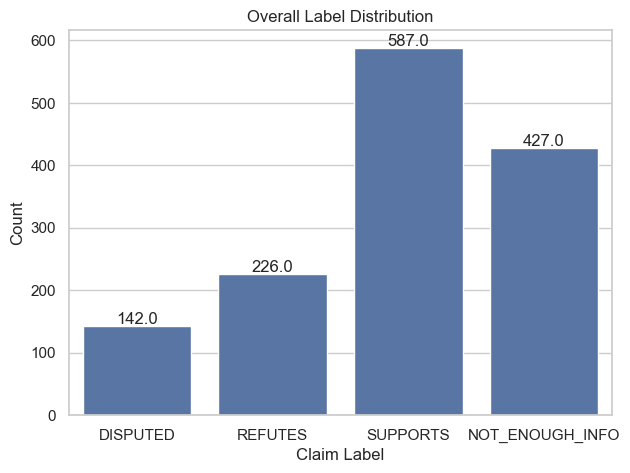

In [3]:
# 1. label distribution
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_all, x='claim_label')
plt.title('Overall Label Distribution')
plt.xlabel('Claim Label')
plt.ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

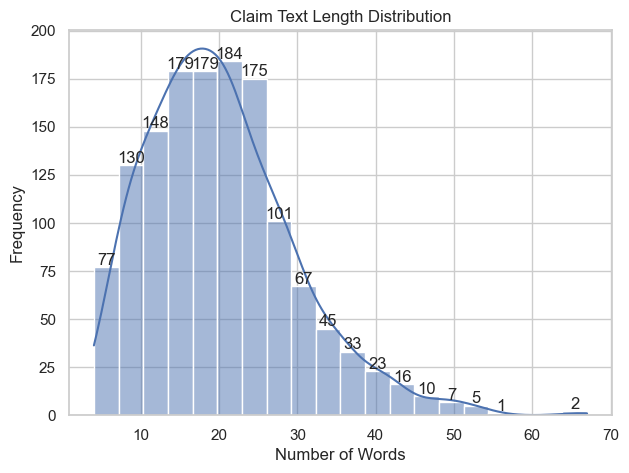

In [4]:
# 2. Claim text length distribution
plt.figure(figsize=(7, 5))
ax = sns.histplot(df_all['text_len'], bins=20, kde=True)
plt.title('Claim Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

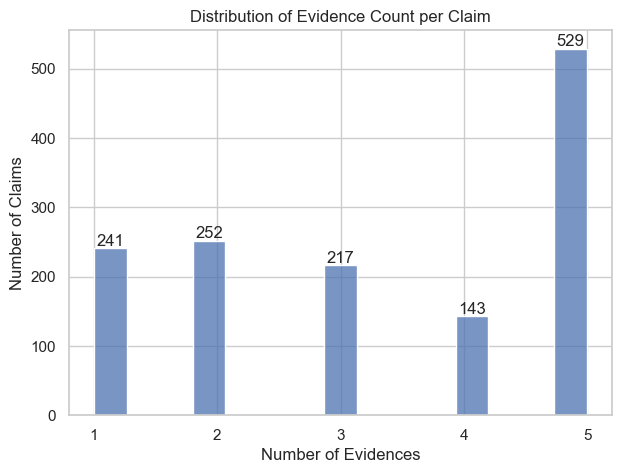

In [5]:
# 3. Evidence count distribution
plt.figure(figsize=(7, 5))
ax = sns.histplot(df_all['num_evidence'], bins=15, kde=False)
plt.title('Distribution of Evidence Count per Claim')
plt.xlabel('Number of Evidences')
plt.ylabel('Number of Claims')
plt.xticks(range(df_all['num_evidence'].min(), df_all['num_evidence'].max() + 1))  # Ensure integer ticks

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### b. Text data pre-processing

In [6]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Get WordNet POS tag from NLTK POS tag
def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Main preprocessing function
def preprocess_text(text):
    # 1. normalize text (lowercase, remove extra spaces)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()

    # 2. tokenization
    tokens = word_tokenize(text)

    # 3. filter out stop words and non-alphanumeric tokens
    def is_valid_token(t):
        return any(c.isalnum() for c in t)

    tokens = [t for t in tokens if is_valid_token(t) and t not in stop_words]

    # 4. Lemmatization
    pos_tags = nltk.pos_tag(tokens)
    lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in pos_tags]

    return lemmas

# Preprocess the claim text
df_all['claim_tokens'] = df_all['claim_text'].apply(preprocess_text)
df_all

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,id,claim_text,claim_label,evidences,data_type,text_len,num_evidence,claim_tokens
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,24,3,"[scientific, evidence, co2, pollutant, high, c..."
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,17,2,"[el, niño, drove, record, highs, global, tempe..."
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,8,2,"[1946, pdo, switch, cool, phase]"
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,16,5,"[weather, channel, co-founder, john, coleman, ..."
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,19,5,"[january, 2008, cap, 12, month, period, global..."
...,...,...,...,...,...,...,...,...
1377,claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",REFUTES,"[evidence-409365, evidence-127519, evidence-85...",dev,31,4,"['to, suddenly, label, co2, pollutant, disserv..."
1378,claim-204,"after a natural orbitally driven warming, atmo...",NOT_ENOUGH_INFO,"[evidence-368192, evidence-261690, evidence-20...",dev,14,5,"[natural, orbitally, driven, warm, atmospheric..."
1379,claim-1426,Many of the world’s coral reefs are already ba...,NOT_ENOUGH_INFO,"[evidence-1124018, evidence-995813, evidence-1...",dev,16,5,"[many, world, coral, reef, already, barren, st..."
1380,claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,[evidence-660755],dev,40,1,"[recent, study, lead, lawrence, livermore, nat..."


In [7]:
# Print claim_text and claim_tokens for a single row in df_all
row_index = 0 # change for testing
print("Claim Text:", df_all.loc[row_index, 'claim_text'])
print("Claim Tokens:", df_all.loc[row_index, 'claim_tokens'])

Claim Text: Not only is there no scientific evidence that CO2 is a pollutant, higher CO2 concentrations actually help ecosystems support more plant and animal life.
Claim Tokens: ['scientific', 'evidence', 'co2', 'pollutant', 'high', 'co2', 'concentration', 'actually', 'help', 'ecosystems', 'support', 'plant', 'animal', 'life']


In [8]:
# Preprocess the evidence data(it will take about 10 minutes, just run it once)
from tqdm import tqdm

evidence_data_tokens = {
    evid_id: preprocess_text(text) for evid_id, text in tqdm(evidence_data.items())
}


100%|██████████| 1208827/1208827 [08:28<00:00, 2377.98it/s]


In [9]:
import os
import json

# Save the preprocessed evidence data tokens to a JSON file
os.makedirs('../../data', exist_ok=True)
save_path = '../../data/evidence_data_tokens.json'

with open(save_path, 'w', encoding='utf-8') as f:
    json.dump(evidence_data_tokens, f)

print(f"Saved preprocessed evidence tokens to: {save_path}")


Saved preprocessed evidence tokens to: ../../data/evidence_data_tokens.json


In [10]:
import json

# Load the preprocessed evidence data tokens from the JSON file
with open('../../data/evidence_data_tokens.json', 'r', encoding='utf-8') as f:
    evidence_data_tokens = json.load(f)

# Print the first evidence ID and its preprocessed tokens
first_id = list(evidence_data_tokens.keys())[0]
print(f"Evidence ID: {first_id}")
print("\nPreprocessed Tokens:")
print(evidence_data_tokens[first_id])
original_text = evidence_data[first_id]
print("Original Text:")
print(original_text)

Evidence ID: evidence-0

Preprocessed Tokens:
['john', 'bennet', 'lawes', 'english', 'entrepreneur', 'agricultural', 'scientist']
Original Text:
John Bennet Lawes, English entrepreneur and agricultural scientist


In [11]:
# Preprocess the claim text in train and dev data
df_train['claim_tokens'] = df_train['claim_text'].apply(preprocess_text)
df_dev['claim_tokens'] = df_dev['claim_text'].apply(preprocess_text)
df_train

,id,claim_text,claim_label,evidences,data_type,claim_tokens
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,"[scientific, evidence, co2, pollutant, high, c..."
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,"[el, niño, drove, record, highs, global, tempe..."
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,"[1946, pdo, switch, cool, phase]"
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,"[weather, channel, co-founder, john, coleman, ..."
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,"[january, 2008, cap, 12, month, period, global..."
...,...,...,...,...,...,...
1223,claim-1504,Climate scientists say that aspects of the cas...,SUPPORTS,"[evidence-1055682, evidence-1047356, evidence-...",train,"[climate, scientist, say, aspect, case, hurric..."
1224,claim-243,"In its 5th assessment report in 2013, the IPCC...",SUPPORTS,[evidence-916755],train,"[5th, assessment, report, 2013, ipcc, estimate..."
1225,claim-2302,"Since the mid 1970s, global temperatures have ...",NOT_ENOUGH_INFO,"[evidence-403673, evidence-889933, evidence-11...",train,"[since, mid, 1970s, global, temperature, warm,..."
1226,claim-502,But abnormal temperature spikes in February an...,NOT_ENOUGH_INFO,"[evidence-97375, evidence-562427, evidence-521...",train,"[abnormal, temperature, spike, february, earli..."


### c. “Digitizing” data to prepare for training models

In [12]:
import random
import pandas as pd
from tqdm import tqdm

# Construct claim-evidence-label sample pairs
def construct_training_pairs(df_claims, evidence_token_dict, num_negatives=5, seed=42):
    """
    Build positive and negative pairs for each claim and use tqdm to show the progress.
    """
    random.seed(seed)
    pairs = []
    all_evidence_ids = list(evidence_token_dict.keys())

    # tqdm wraps iterrows() and displays a progress bar
    for _, row in tqdm(df_claims.iterrows(), total=len(df_claims), desc="Constructing pairs"):
        claim_id = row['id']
        claim_tokens = row['claim_tokens']
        gold_ids = row['evidences']

        # Get all positive sample (label=1)
        for evid_id in gold_ids:
            if evid_id in evidence_token_dict:
                pairs.append({
                    'claim_id': claim_id,
                    'claim_tokens': claim_tokens,
                    'evidence_id': evid_id,
                    'evidence_tokens': evidence_token_dict[evid_id],
                    'label': 1
                })

        # Randomly select 5 negative samples (label=0)
        non_gold = list(set(all_evidence_ids) - set(gold_ids))
        negative_ids = random.sample(non_gold, min(num_negatives, len(non_gold)))
        for evid_id in negative_ids:
            pairs.append({
                'claim_id': claim_id,
                'claim_tokens': claim_tokens,
                'evidence_id': evid_id,
                'evidence_tokens': evidence_token_dict[evid_id],
                'label': 0
            })

    return pd.DataFrame(pairs)

train_pairs = construct_training_pairs(df_train, evidence_data_tokens, num_negatives=3)
train_pairs


Constructing pairs: 100%|██████████| 1228/1228 [03:55<00:00,  5.22it/s]



,claim_id,claim_tokens,evidence_id,evidence_tokens,label
0,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-442946,"[high, concentration, 100, time, atmospheric, ...",1
1,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-1194317,"[plant, grow, much, 50, percent, faster, conce...",1
2,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-12171,"[high, carbon, dioxide, concentration, favoura...",1
3,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-312587,"[dr., hussein, one, founder, unite, somali, co...",0
4,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-815005,"[eckbolsheim, commune, bas-rhin, department, g...",0
...,...,...,...,...,...
7801,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-298971,"[water, fat, substance, food, absorb, energy, ...",1
7802,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-883158,"[microwave, oven, pass, microwave, radiation, ...",1
7803,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-487939,"[notable, people, surname, include]",0
7804,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-1033644,"[28, january, 2014, announce, ryan, would, mov...",0


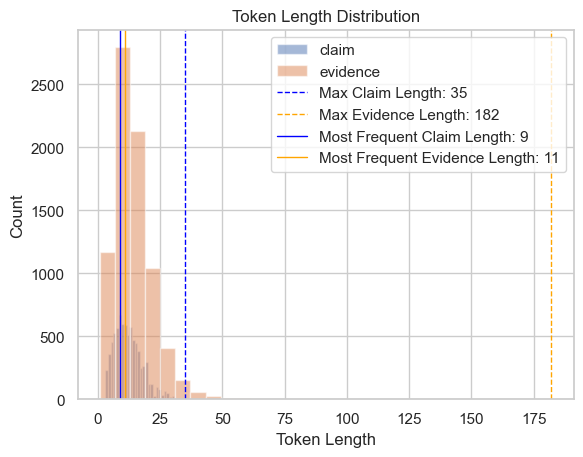

In [13]:
import matplotlib.pyplot as plt

#len of claim token 
train_pairs['claim_len'] = train_pairs['claim_tokens'].apply(len)

# len Evidence token
train_pairs['evidence_len'] = train_pairs['evidence_tokens'].apply(len)

# Merge Visualization
plt.hist(train_pairs['claim_len'], bins=30, alpha=0.5, label='claim')
plt.hist(train_pairs['evidence_len'], bins=30, alpha=0.5, label='evidence')

# Mark the highest value
max_claim_len = train_pairs['claim_len'].max()
max_evidence_len = train_pairs['evidence_len'].max()

plt.axvline(max_claim_len, color='blue', linestyle='dashed', linewidth=1, label=f'Max Claim Length: {max_claim_len}')
plt.axvline(max_evidence_len, color='orange', linestyle='dashed', linewidth=1, label=f'Max Evidence Length: {max_evidence_len}')

# Mark the value with the highest frequency
most_frequent_claim_len = train_pairs['claim_len'].value_counts().idxmax()
most_frequent_evidence_len = train_pairs['evidence_len'].value_counts().idxmax()

plt.axvline(most_frequent_claim_len, color='blue', linestyle='solid', linewidth=1, label=f'Most Frequent Claim Length: {most_frequent_claim_len}')
plt.axvline(most_frequent_evidence_len, color='orange', linestyle='solid', linewidth=1, label=f'Most Frequent Evidence Length: {most_frequent_evidence_len}')

plt.xlabel('Token Length')
plt.ylabel('Count')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

# Drop the length columns after visualization
train_pairs = train_pairs.drop(columns=['claim_len', 'evidence_len'])

In [14]:
from collections import Counter

# Step 1: Building a vocabulary
def build_vocab(train_df, min_freq=1):
    counter = Counter()

    for tokens in train_df['claim_tokens'].tolist() + train_df['evidence_tokens'].tolist():
        counter.update(tokens)

    vocab = {"<PAD>": 0, "<UNK>": 1}
    idx = 2
    for word, freq in counter.items():
        if freq >= min_freq:
            vocab[word] = idx
            idx += 1

    return vocab

# Step 2: tokens → index
def tokens_to_indices(tokens, vocab):
    return [vocab.get(t, vocab["<UNK>"]) for t in tokens]

# Step 3: padding
def pad_sequence(indices, max_len, pad_value=0):
    if len(indices) >= max_len:
        return indices[:max_len]
    else:
        return indices + [pad_value] * (max_len - len(indices))

# Step 4: Apply to train_pairs
MAX_LEN_CLAIM = 40
MAX_LEN_EVIDENCE = 80

# Build vocabulary with train_pairs
vocab = build_vocab(train_pairs)

# Perform token → index → ​​padding
train_pairs['claim_indices'] = train_pairs['claim_tokens'].apply(
    lambda x: pad_sequence(tokens_to_indices(x, vocab), MAX_LEN_CLAIM))

train_pairs['evidence_indices'] = train_pairs['evidence_tokens'].apply(
    lambda x: pad_sequence(tokens_to_indices(x, vocab), MAX_LEN_EVIDENCE))

train_pairs


,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-442946,"[high, concentration, 100, time, atmospheric, ...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 404, 55, 118, 7, 350, 288, 289, 1945, 1..."
1,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-1194317,"[plant, grow, much, 50, percent, faster, conce...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[12, 245, 100, 907, 313, 1892, 7, 704, 802, 33..."
2,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-12171,"[high, carbon, dioxide, concentration, favoura...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 288, 289, 7, 3366, 946, 12, 2218, 3367, 39..."
3,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-312587,"[dr., hussein, one, founder, unite, somali, co...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[1184, 3368, 940, 3369, 3370, 3371, 275, 962, ..."
4,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-815005,"[eckbolsheim, commune, bas-rhin, department, g...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[3376, 3377, 3378, 3151, 3379, 3380, 3381, 105..."
...,...,...,...,...,...,...,...
7801,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-298971,"[water, fat, substance, food, absorb, energy, ...",1,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[390, 6750, 2022, 2268, 604, 605, 3348, 137, 1..."
7802,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-883158,"[microwave, oven, pass, microwave, radiation, ...",1,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[3348, 19181, 2644, 3348, 1758, 1470, 526, 326..."
7803,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-487939,"[notable, people, surname, include]",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[7522, 675, 8701, 628, 0, 0, 0, 0, 0, 0, 0, 0,..."
7804,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-1033644,"[28, january, 2014, announce, ryan, would, mov...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[3645, 43, 2468, 4693, 19183, 88, 722, 8782, 4..."


In [18]:
# Save train_pairs as JSON, one sample per line
train_pairs.to_json("../../data/train_pairs.json", orient="records", lines=True, force_ascii=False)

print("train_pairs has been successfully saved as a JSON file：../../data/train_pairs.json")

# Loading the JSON file
train_pairs = pd.read_json("../../data/train_pairs.json", orient="records", lines=True)
train_pairs


train_pairs has been successfully saved as a JSON file：../../data/train_pairs.json


,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-442946,"[high, concentration, 100, time, atmospheric, ...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 404, 55, 118, 7, 350, 288, 289, 1945, 1..."
1,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-1194317,"[plant, grow, much, 50, percent, faster, conce...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[12, 245, 100, 907, 313, 1892, 7, 704, 802, 33..."
2,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-12171,"[high, carbon, dioxide, concentration, favoura...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 288, 289, 7, 3366, 946, 12, 2218, 3367, 39..."
3,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-312587,"[dr., hussein, one, founder, unite, somali, co...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[1184, 3368, 940, 3369, 3370, 3371, 275, 962, ..."
4,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-815005,"[eckbolsheim, commune, bas-rhin, department, g...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[3376, 3377, 3378, 3151, 3379, 3380, 3381, 105..."
...,...,...,...,...,...,...,...
7801,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-298971,"[water, fat, substance, food, absorb, energy, ...",1,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[390, 6750, 2022, 2268, 604, 605, 3348, 137, 1..."
7802,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-883158,"[microwave, oven, pass, microwave, radiation, ...",1,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[3348, 19181, 2644, 3348, 1758, 1470, 526, 326..."
7803,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-487939,"[notable, people, surname, include]",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[7522, 675, 8701, 628, 0, 0, 0, 0, 0, 0, 0, 0,..."
7804,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-1033644,"[28, january, 2014, announce, ryan, would, mov...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[3645, 43, 2468, 4693, 19183, 88, 722, 8782, 4..."


# 2. Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

# 3.Testing and Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*